# Ejercicio de Regresión Logística en Python
Para comenzar se realizan las import necesarios de los paquetes que se utilizanran durante el ejercicio.

## Carlos Antonio Rascon Carlos 16111750 

In [1]:
import pandas as pd 
import numpy as np 
from sklearn import linear_model 
from sklearn import model_selection
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

## Carga del archivo csv (datos de entrada) 

El archivo csv (por simplicidad, se considera que estara en el mismo directorio que el archivo de notebook.ipyn) y se asigna mediante Panda a la variable dataframe. al utilizar el metodo dataframe.head() se visualiza en pantalla 5 primeros registros.

In [2]:
dataframe = pd.read_csv(r"usuarios win-mac-lin.csv")
dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


A continuacion se utiliza el metodo dataframe.describe() que proporciona estadistica descriptiva del conjunto de datos: media, desviacion estandar, valores minimo y maximo de cada atributo.

In [3]:
dataframe.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


s usuaruis se cuantifican resultados de cada tipo usando la funcion groupby y se visualizan 86 usuaruis "Clase 0", es decir Windows, 40 usuarios Mac y 44 de Linux.  

In [4]:
print(dataframe.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


### Visualizamos los datos 

Se realiza una visualizacion para conocer a los atributos caracterisiticos de la informacion que se trabaja y su correlación. 

En formato de histograma a parecen los cuatro atributos de entrada etiquetados como: "duracion", "paginas", "acciones" y "valor". Se puede apreciar graficamente entre que valores se comprenden sus minimos y maximos y enq ue intervalos se conenctra la mator densidad de registros. 

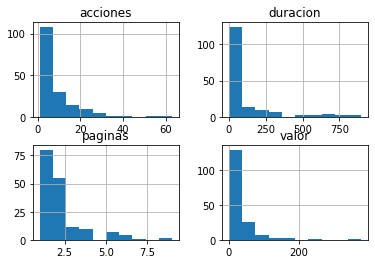

In [5]:
dataframe.drop(['clase'],1).hist()
plt.show()

Ademas se pueden interrelacionar las entradas de a pares, para ver como se concentraron linealmente las salidas de usuarios por colores: sistema operativo Windows en azul, Macintosh en verde y linux en rojo. 

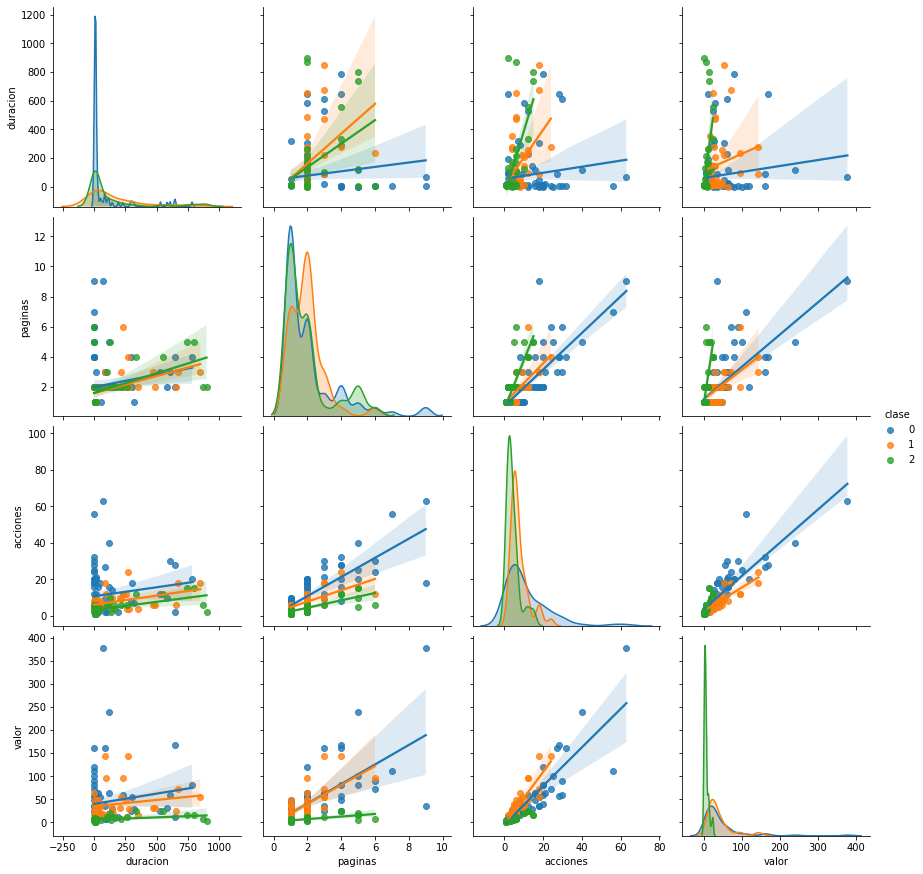

In [6]:
sb.pairplot(dataframe.dropna(), hue='clase',height=3,vars=["duracion", "paginas", "acciones", "valor"],kind='reg')

### Se establece el modelo de R Log 

se cargan los atributos de las columnas de entrada en x excluyendo la clumna "clase" con el metodo drop(). La columna "clase" se agrega el atributo y se ejecuta X.shape para comprobar la dimension de la matriz con los datos de entrada de 170 registros por 4 columnas.

In [9]:
X = np.array(dataframe.drop(['clase'],1))
y = np.array(dataframe['clase'])
X.shape

(170, 4)

Y se crea el modelo de RLog haciendo que se ajuste (fit) al conjunto de entradas X y salidas ‘y’. 

In [11]:
model = linear_model.LogisticRegression()
model.fit(X,y)

C:\Users\rasco\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Una vez compilado el modelo, se clasifica todo el conjunto de entradas X utilizando el método “predict(X)”. Si se revisan algunas de sus salidas se puede ver como coincide con las salidas reales del archivo csv. 

In [12]:
predictions = model.predict(X)
print(predictions[0:5])

[2 2 2 2 2]


Y se confirma el desempeño del modelo utilizando model.score() el cuál devuelve la precisión media de las predicciones, para este caso del 77%. 

In [13]:
model.score(X,y)

0.7823529411764706

###  Adicional: Validación del Modelo

Una buena práctica en Machine Learning es la de subdividir el conjunto de datos de entrada en un conjunto de entrenamiento y uno mas para validar el modelo (que no se utiliza durante el entrenamiento y por lo tanto la máquina desconoce). Esto evitará problemas en los que el algoritmo pueda fallar por “sobregeneralizar” el conocimiento.

Para ello, se subdividen los datos de entrada en forma aleatoria utilizando 80% de registros para entrenamiento y 20% para validación.

In [15]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

Se compila nuevamente el modelo de Regresión Logística pero esta vez sólo con 80% de los datos de entrada y se calcula el nuevo desempeño que ahora registra 74%. 

In [16]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

C:\Users\rasco\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\rasco\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\rasco\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

In

Logistic Regression: 0.728571 (0.094186)


C:\Users\rasco\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\rasco\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Se realizan las predicciones---clasificación---utilizando “cross validation set” el conjunto reservado para validación. En este caso se aprecia que los aciertos fueron del 85% sin olvidar tener en cuenta que el tamaño de datos es pequeño. 

In [17]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.8529411764705882


### Reporte de Resultados del Modelo RLog 

Finalmente se obtiene la “matriz de confusión” la cuál muestra cuántos resultados equivocados tuvo de cada clase (los que no están en la diagonal); por ejemplo, predijo 3 usuarios que eran Mac como usuarios de Windows y predijo a 2 usuarios Linux que realmente eran de Windows.

In [18]:
print(confusion_matrix(Y_validation, predictions))

[[16  0  2]
 [ 3  3  0]
 [ 0  0 10]]


In [19]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       1.00      0.50      0.67         6
           2       0.83      1.00      0.91        10

    accuracy                           0.85        34
   macro avg       0.89      0.80      0.81        34
weighted avg       0.87      0.85      0.84        34



Se obtiene el reporte de clasificación del conjunto de Validación. En este caso (de un total de 34 registros) se utilizaron como “soporte” 18 registros windows, 6 de mac y 10 de Linux. Se aprecia la precisión con que se acertaron cada una de las clases que, por ejemplo, Macintosh tuvo 3 aciertos y 3 fallos (0.5 recall). Conviene tener en cuenta que F1-score ofrece una valoración que toma en cuenta la precisión y recall. El promedio de F1-score es de 84% lo cual no está nada mal. 

### Clasificación (o predicción) de nuevos registros

Como último ejercicio, se proporcionan datos de entrada de navegación de un usuario sintéticos y que tiene estos valores:
Tiempo Duración: 10 Paginas visitadas: 3 Acciones al navegar: 5 Valoración: 9 Lo probamos en nuestro modelo y vemos que lo clasifica como un usuario tipo 2, es decir, de Linux.

In [21]:
X_new = pd.DataFrame({'duracion': [10], 'paginas': [3], 'acciones': [5], 'valor': [9]})
model.predict(X_new)

array([2], dtype=int64)

Como un extra del ejercicio habrá que jugar y variar estos valores para obtener usuarios de tipo Windows o Macintosh.En este ejercicio se probó un modelo de Regresión Logística en Python para la clasificación del uso del Sistema Operativo por parte de usuarios y a partir de sus características de navegación en un sitio web. De este ejercicio, se podrá extender a otro tipos de tareas que pueden surgir durante un trabajo en el que se debe clasificar resultados en valores discretos. Recordar que si se tuvieran que predecir valores continuos, se debera aplicar Regresión Lineal. Recuerde descargar los archivos para realizar el Ejercicio: Archivo de Entrada csv (su nombre es usuarios win-mac-lin.csv) Notebook Jupyter Python (clic derecho y “descargar archivo como…”); o bien, se puede ver online en Jupyter Notebook Viewer. Recordatorio: Si se interesa en aprender algoritmos con Python, existen muchos mas que están disponibles gratuitos por toda la web en una infinidad de idiomas. 